In [1]:
import os
import sys
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_dir = os.path.dirname(notebook_dir)

if project_dir not in sys.path:
    sys.path.append(project_dir)

import pandas as pd
import numpy as np

In [2]:
all_fighter_cluster = pd.read_csv(r"https://raw.githubusercontent.com/john-adeojo/ufc_styles/main/data/02_intermediate/all_fighter_clusters.csv")
fighter_data = pd.read_csv(r"https://github.com/john-adeojo/ufc_styles/blob/main/data/02_intermediate/fighter_data.csv?raw=true")
# all_fighter_cluster.drop(columns='Unnamed: 0', inplace=True)

In [3]:
analysis_data_base = fighter_data.merge(right=all_fighter_cluster[['cluster','specific_cluster', 'Fighter_dims', 'weight_class']], how='left', left_on=['Fighter_dims', 'weight_class'], right_on=['Fighter_dims', 'weight_class'])
analysis_data_base = analysis_data_base.dropna(subset=['cluster'])
analysis_data_opp = analysis_data_base.copy()
analysis_data_opp['opp_specific_cluster'] = analysis_data_opp['specific_cluster']
analysis_data = analysis_data_base.merge(right=analysis_data_opp[['weight_class', 'Fighter_dims', 'date', 'opp_specific_cluster']], how='inner', left_on=['weight_class', 'Opponent', 'date'], right_on=['weight_class', 'Fighter_dims', 'date'] )
analysis_data_opposing_styles = analysis_data.loc[analysis_data['opp_specific_cluster'] != analysis_data['specific_cluster']].copy()
analysis_data_opposing_styles

,R_fighter,B_fighter,date,Winner,weight_class,avg_KD,avg_opp_KD,avg_SUB_ATT,avg_opp_SUB_ATT,avg_REV,...,Stance_Southpaw,Stance_Switch,Stance_nan,fighter,method,fighter_result,cluster,specific_cluster,Fighter_dims_y,opp_specific_cluster
4,Arman Tsarukyan,Mateusz Gamrot,2022-06-25,Blue,Lightweight,0.000291,0.000291,0.000582,0.000000,0.000000,...,1.0,0.0,0.0,Mateusz Gamrot,U-DEC,Win by U-DEC,0.0,0_Lightweight,Arman Tsarukyan,2_Lightweight
6,Shayilan Nuerdanbieke,TJ Brown,2022-06-25,Red,Featherweight,0.000000,0.000293,0.002053,0.001027,0.001173,...,0.0,1.0,0.0,TJ Brown,U-DEC,Loss by U-DEC,0.0,0_Featherweight,Shayilan Nuerdanbieke,2_Featherweight
8,Vanessa Demopoulos,Jinh Yu Frey,2022-06-25,Red,WomenStrawweight,0.000000,0.000000,0.000568,0.000142,0.000000,...,1.0,0.0,0.0,Jinh Yu Frey,S-DEC,Loss by S-DEC,0.0,0_WomenStrawweight,Vanessa Demopoulos,1_WomenStrawweight
9,JP Buys,Cody Durden,2022-06-25,Blue,Flyweight,0.000000,0.001278,0.000319,0.001917,0.000000,...,1.0,0.0,0.0,Cody Durden,KO/TKO,Win by KO/TKO,0.0,0_Flyweight,JP Buys,2_Flyweight
16,Joaquin Buckley,Albert Duraev,2022-06-18,Red,Middleweight,0.000000,0.001111,0.001111,0.000000,0.000000,...,0.0,0.0,0.0,Albert Duraev,KO/TKO,Loss by KO/TKO,0.0,0_Middleweight,Joaquin Buckley,2_Middleweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8593,Jens Pulver,BJ Penn,2002-01-11,Red,Lightweight,0.000103,0.000000,0.000488,0.001233,0.000051,...,1.0,0.0,0.0,Jens Pulver,M-DEC,Win by M-DEC,0.0,0_Lightweight,BJ Penn,2_Lightweight
8594,BJ Penn,Caol Uno,2001-11-02,Red,Lightweight,0.002179,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,BJ Penn,KO/TKO,Win by KO/TKO,2.0,2_Lightweight,Caol Uno,0_Lightweight
8595,Matt Lindland,Phil Baroni,2001-11-02,Red,Middleweight,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,Matt Lindland,M-DEC,Win by M-DEC,2.0,2_Middleweight,Phil Baroni,0_Middleweight
8596,Jens Pulver,Dennis Hallman,2001-09-28,Red,Lightweight,0.000268,0.000000,0.000201,0.000000,0.000134,...,1.0,0.0,0.0,Jens Pulver,U-DEC,Win by U-DEC,0.0,0_Lightweight,Dennis Hallman,2_Lightweight


In [4]:
analysis_data_opposing_styles = analysis_data_opposing_styles.loc[analysis_data_opposing_styles['corner'] == 'Red'].copy()
analysis_data_opposing_styles

,R_fighter,B_fighter,date,Winner,weight_class,avg_KD,avg_opp_KD,avg_SUB_ATT,avg_opp_SUB_ATT,avg_REV,...,Stance_Southpaw,Stance_Switch,Stance_nan,fighter,method,fighter_result,cluster,specific_cluster,Fighter_dims_y,opp_specific_cluster
4306,Arman Tsarukyan,Mateusz Gamrot,2022-06-25,Blue,Lightweight,0.000537,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,Arman Tsarukyan,U-DEC,Loss by U-DEC,2.0,2_Lightweight,Mateusz Gamrot,0_Lightweight
4308,Shayilan Nuerdanbieke,TJ Brown,2022-06-25,Red,Featherweight,0.000000,0.000000,0.000000,0.000556,0.001111,...,0.0,0.0,0.0,Shayilan Nuerdanbieke,U-DEC,Win by U-DEC,2.0,2_Featherweight,TJ Brown,0_Featherweight
4310,Vanessa Demopoulos,Jinh Yu Frey,2022-06-25,Red,WomenStrawweight,0.000000,0.000957,0.001914,0.000000,0.000000,...,0.0,0.0,0.0,Vanessa Demopoulos,S-DEC,Win by S-DEC,1.0,1_WomenStrawweight,Jinh Yu Frey,0_WomenStrawweight
4311,JP Buys,Cody Durden,2022-06-25,Blue,Flyweight,0.000000,0.005087,0.002907,0.000727,0.000000,...,0.0,0.0,0.0,JP Buys,KO/TKO,Loss by KO/TKO,2.0,2_Flyweight,Cody Durden,0_Flyweight
4318,Joaquin Buckley,Albert Duraev,2022-06-18,Red,Middleweight,0.000576,0.000266,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,Joaquin Buckley,KO/TKO,Win by KO/TKO,2.0,2_Middleweight,Albert Duraev,0_Middleweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8593,Jens Pulver,BJ Penn,2002-01-11,Red,Lightweight,0.000103,0.000000,0.000488,0.001233,0.000051,...,1.0,0.0,0.0,Jens Pulver,M-DEC,Win by M-DEC,0.0,0_Lightweight,BJ Penn,2_Lightweight
8594,BJ Penn,Caol Uno,2001-11-02,Red,Lightweight,0.002179,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,BJ Penn,KO/TKO,Win by KO/TKO,2.0,2_Lightweight,Caol Uno,0_Lightweight
8595,Matt Lindland,Phil Baroni,2001-11-02,Red,Middleweight,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,Matt Lindland,M-DEC,Win by M-DEC,2.0,2_Middleweight,Phil Baroni,0_Middleweight
8596,Jens Pulver,Dennis Hallman,2001-09-28,Red,Lightweight,0.000268,0.000000,0.000201,0.000000,0.000134,...,1.0,0.0,0.0,Jens Pulver,U-DEC,Win by U-DEC,0.0,0_Lightweight,Dennis Hallman,2_Lightweight


In [5]:
import pandas as pd

# Assuming your DataFrame is named 'analysis_data_opposing_styles'
# and the columns to combine are 'specific_cluster' and 'opp_specific_cluster'

def create_style_matchup(row):
    # Combine the two columns and sort them alphabetically
    matchup = sorted([row['specific_cluster'], row['opp_specific_cluster']])
    
    # Join them with ' vs. ' and return the result
    return matchup[0] + ' vs. ' + matchup[1]

# Apply the custom function to each row and create the new 'style_matchup' column
analysis_data_opposing_styles['style_matchup'] = analysis_data_opposing_styles.apply(create_style_matchup, axis=1)

# Display the DataFrame
analysis_data_opposing_styles.sort_values(by='weight_class', inplace=True)


In [6]:
weight_class = list(analysis_data_opposing_styles['weight_class'].drop_duplicates())
weight_class

['Bantamweight',
 'CatchWeight',
 'Featherweight',
 'Flyweight',
 'Heavyweight',
 'LightHeavyweight',
 'Lightweight',
 'Middleweight',
 'Welterweight',
 'WomenFlyweight',
 'WomenStrawweight']

In [7]:
from scripts.chisquareanalysis import ChiSquareAnalysis

# Assuming weight_class is a list of weight classes

# Initialize an empty dictionary to store the results
results_dict = {}

for weights in weight_class:
    analysis = ChiSquareAnalysis(df=analysis_data_opposing_styles, category=weights)
    result = analysis.run_chisquare_analysis('fighter_result')
    
    # Save the result in the dictionary with the weight as the key
    results_dict[weights] = result

# Display the results dictionary
results_dict

Chi2 Stat: 28.825901688011065
P Value: 0.05054875528158479
Degrees of Freedom: 18
Chi2 Stat: 13.425641025641026
P Value: 0.2008374331678513
Degrees of Freedom: 10
Chi2 Stat: 21.89650439633363
P Value: 0.1465648125646093
Degrees of Freedom: 16
Chi2 Stat: 12.664899429574753
P Value: 0.5530627827154784
Degrees of Freedom: 14
Chi2 Stat: 0.0
P Value: 1.0
Degrees of Freedom: 0
Chi2 Stat: 20.79245179063361
P Value: 0.18662717991872355
Degrees of Freedom: 16
Chi2 Stat: 11.739215400954702
P Value: 0.962533226223222
Degrees of Freedom: 22
Chi2 Stat: 19.607799386531
P Value: 0.48269147162262505
Degrees of Freedom: 20
Chi2 Stat: 83.37053075451333
P Value: 0.9725064373353143
Degrees of Freedom: 110
Chi2 Stat: 0.0
P Value: 1.0
Degrees of Freedom: 0
Chi2 Stat: 0.0
P Value: 1.0
Degrees of Freedom: 0


{'Bantamweight': fighter_result                      style_matchup  Draw by DRAW  Loss by DQ  \
 0               0_Bantamweight vs. 1_Bantamweight     -0.264135   -0.264135   
 1               0_Bantamweight vs. 2_Bantamweight      0.482343   -0.787499   
 2               1_Bantamweight vs. 2_Bantamweight     -0.556846    1.238982   
 
 fighter_result  Loss by KO/TKO  Loss by S-DEC  Loss by SUB  Loss by U-DEC  \
 0                    -0.477325      -0.698836     1.731553      -0.988304   
 1                    -0.334568      -0.163706    -0.246094      -0.570895   
 2                     0.699565       0.563002    -0.473319       1.276160   
 
 fighter_result  Win by KO/TKO  Win by S-DEC  Win by SUB  Win by U-DEC  
 0                    2.796920     -0.646997   -0.988304     -0.824909  
 1                   -1.257117      0.663084    1.465384      0.708239  
 2                    0.451136     -0.630845   -1.603572     -0.610312  ,
 'CatchWeight': fighter_result                    style

In [8]:
fighter_result = list(analysis_data_opposing_styles['fighter_result'].drop_duplicates())

In [9]:
from scripts.chisquareanalysis import ChiSquareAnalysis
analysis = ChiSquareAnalysis(df=analysis_data_opposing_styles, category='Bantamweight')
result_batamweight = analysis.run_chisquare_analysis('fighter_result')
result_batamweight

Chi2 Stat: 28.825901688011065
P Value: 0.05054875528158479
Degrees of Freedom: 18


fighter_result,style_matchup,Draw by DRAW,Loss by DQ,Loss by KO/TKO,Loss by S-DEC,Loss by SUB,Loss by U-DEC,Win by KO/TKO,Win by S-DEC,Win by SUB,Win by U-DEC
0,0_Bantamweight vs. 1_Bantamweight,-0.264135,-0.264135,-0.477325,-0.698836,1.731553,-0.988304,2.796920,-0.646997,-0.988304,-0.824909
1,0_Bantamweight vs. 2_Bantamweight,0.482343,-0.787499,-0.334568,-0.163706,-0.246094,-0.570895,-1.257117,0.663084,1.465384,0.708239
2,1_Bantamweight vs. 2_Bantamweight,-0.556846,1.238982,0.699565,0.563002,-0.473319,1.276160,0.451136,-0.630845,-1.603572,-0.610312


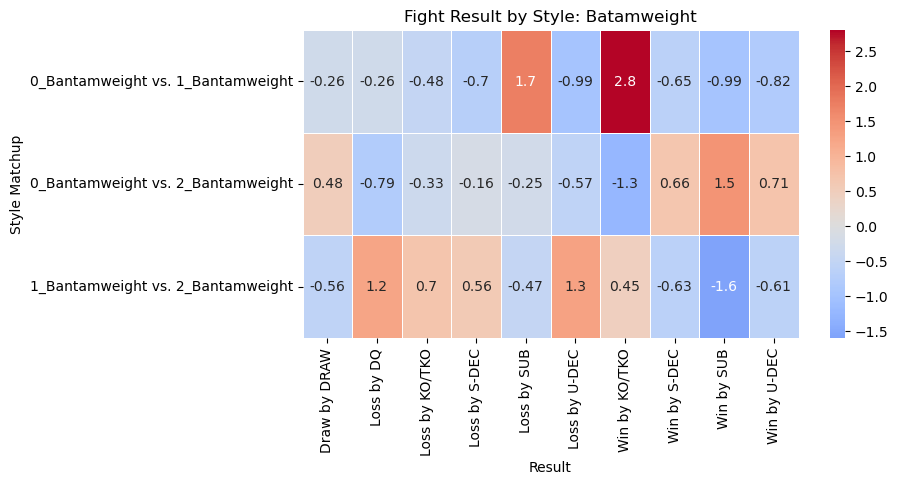

In [12]:
result_batamweight_col = result_batamweight.drop(columns=['style_matchup']).columns

# Prepare the data for the heatmap
heatmap_data = result_batamweight.set_index('style_matchup')[result_batamweight_col]

# Create the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, linewidths=0.5, center=0)
plt.title('Fight Result by Style: Batamweight')
plt.xlabel('Result')
plt.ylabel('Style Matchup')
#plt.savefig(r"C:\Users\johna\anaconda3\envs\twitter-influence-env\twitter-influence\data\03_reports\sentiment_heatmap.png")
plt.show()

In [13]:
import requests
import json
# import style dims
url = 'https://github.com/john-adeojo/ufc_styles/raw/main/data/02_intermediate/style_dims_names.json'

# Fetch the JSON file content
response = requests.get(url)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    try:
        # Load the content into a list
        style_dims_names = json.loads(response.text)
        print("Data loaded successfully:")
    except json.JSONDecodeError as e:
        print(f"Failed to decode JSON: {e}")
else:
    print(f"Failed to fetch JSON file: {response.status_code}")

Data loaded successfully:


In [14]:
style_dims_names_2 = style_dims_names
style_dims_names_2.append('specific_cluster')

In [15]:
selected_clusters = ['0_Bantamweight', '1_Bantamweight', '2_Bantamweight']
filtered_data = all_fighter_cluster[all_fighter_cluster['specific_cluster'].isin(selected_clusters)]
analytics_for_radar = filtered_data[style_dims_names_2].groupby(['specific_cluster']).mean()
analytics_for_radar.reset_index(inplace=True)
analytics_for_radar

,specific_cluster,avg_KD,avg_opp_KD,avg_SUB_ATT,avg_opp_SUB_ATT,avg_REV,avg_opp_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_opp_SIG_STR_att,...,avg_GROUND_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_CTRL_time(seconds),avg_opp_CTRL_time(seconds),Stance_Open Stance,Stance_Orthodox,Stance_Sideways,Stance_Southpaw,Stance_Switch
0,0_Bantamweight,0.007694,0.035954,0.026235,0.023852,0.065307,0.036496,0.165270,0.081110,0.247748,...,0.010535,0.045968,0.051408,0.191364,0.214311,0.0,0.0,0.0,1.0,0.0
1,1_Bantamweight,0.014229,0.008952,0.020158,0.018466,0.038206,0.025677,0.222598,0.119469,0.352413,...,0.011882,0.038255,0.032416,0.154601,0.172166,0.0,0.0,0.0,0.0,1.0
2,2_Bantamweight,0.013894,0.015405,0.030178,0.027136,0.043702,0.035896,0.174296,0.083057,0.256743,...,0.011352,0.036989,0.037138,0.196226,0.217063,0.0,1.0,0.0,0.0,0.0


In [21]:
analytics_for_radar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   specific_cluster            3 non-null      object 
 1   avg_KD                      3 non-null      float64
 2   avg_opp_KD                  3 non-null      float64
 3   avg_SUB_ATT                 3 non-null      float64
 4   avg_opp_SUB_ATT             3 non-null      float64
 5   avg_REV                     3 non-null      float64
 6   avg_opp_REV                 3 non-null      float64
 7   avg_SIG_STR_att             3 non-null      float64
 8   avg_SIG_STR_landed          3 non-null      float64
 9   avg_opp_SIG_STR_att         3 non-null      float64
 10  avg_opp_SIG_STR_landed      3 non-null      float64
 11  avg_TOTAL_STR_att           3 non-null      float64
 12  avg_TOTAL_STR_landed        3 non-null      float64
 13  avg_opp_TOTAL_STR_att       3 non-null 

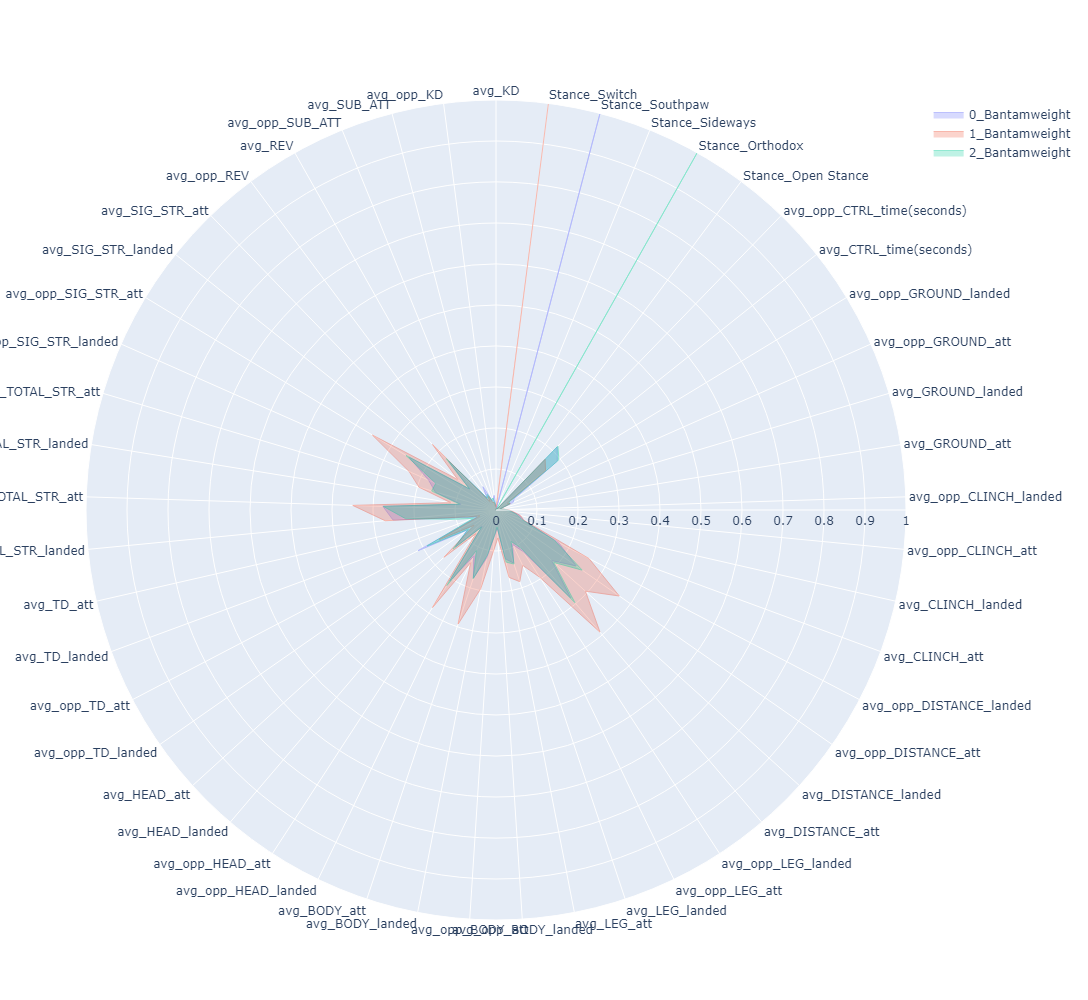

In [36]:
import plotly.graph_objects as go
import pandas as pd

# Replace this with your actual dataframe
# analytics_for_radar = ...

# Select dimensions to plot
selected_dimensions = analytics_for_radar.drop(columns='specific_cluster').columns

def plot_fighters_radar_chart(data=analytics_for_radar, dimensions=selected_dimensions):
    fig = go.Figure()

    for specific_cluster in data['specific_cluster'].unique():
        cluster_data = data[data['specific_cluster'] == specific_cluster]

        fig.add_trace(go.Scatterpolar(
            r=cluster_data[dimensions].values.tolist()[0],
            theta=dimensions,
            fill='toself',
            name=specific_cluster,
            opacity=0.5,
            line=dict(width=0.8)
        ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, data[dimensions].values.astype(float).max()]  # Set the range based on the maximum value in the data
            ),
            angularaxis=dict(
                rotation=90,
                direction="counterclockwise"
            ),
        ),
        showlegend=True,
        width=1400,
        height=1000
    )

    fig.show()

plot_fighters_radar_chart()
